# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [329]:
!pip install scikit-learn

In [330]:
!pip install ydata_profiling

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

In [332]:
RANDOM_STATE=42

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here`

Мы фиксируем сиды для воспроизведения результатов, так как при работе множества функций в данном ноутбуке будет использоваться рандомизация


# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [333]:
import pandas as pd

In [334]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

Отображаем 30 строчек датасета

In [335]:
df_train.sample(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


Отображаем пять первых

In [336]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


Отображаем пять последних

In [337]:
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Далее просматриваем основную информацию по признаках через info

In [338]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Дополнительно просматриваем статистику по числовым признакам через describe

In [339]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [340]:
df_train.describe(include="object")

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


Как можно увиедть по таблице info пропуски имеются в столбцах  mileage, engine, max_power, torque, seats. Дополнительно проверим, что в тестовых данных ситуация та же

In [341]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


В тестовых данных пропуски в тех же столбцах

А теперь проверим наличие дубликатов

In [342]:
print(f"Количество дубликатов в train: {df_train.duplicated(keep=False).sum()}")
print(f"Количество дубликатов в test: {df_test.duplicated(keep=False).sum()}")

Количество дубликатов в train: 1478
Количество дубликатов в test: 95


Было найдено 1478 дубликатов в основном наборе данных и 95 в тестовом

 Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

Можно сделать выводы о формате и структуре данных и не изменился ли формат между тем как данные начали собиратьи закончили.

Нельзя сделать выводы о распределении значений, какое может быть максимальное и минимальное и какое среднеее. НЕльзя делать выводы о наличии пропусков если ни один не попался(если попались можно сделать выводы что есть и с дублями так же)



 Достаточно ли метода duplicated для анализа дубликатов? Почему?

Метода duplicated может быть недостаточно так как могут быть неполные дубли например с разнорй целевой переменной или же дубли где одно значение утеренно или повреждено (неверный тип данных, лишний пробел или ещё что-то)

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

Данное задание будет отложенно до того момента пока столбцы не будут переведены в числовой вид

In [343]:
#mileage_median = df_train["mileage"].median()
#engine_median = df_train["engine"].median()
#max_power_median = df_train["max_power"].median()
#torque_median = df_train["torque"].median()
#seats_median = df_train["seats"].median()
#
#print(f"Медианное значение mileage: {mileage_median}.\n Медианное значение engine: {engine_median}.\n Медианное значение max_power: {max_power_median}.\n Медианное значение torque: {torque_median}.\n Медианноезначение seats: {seats_median}.\n")

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


Сначала убираем целевую переменную

In [344]:
df_train_x = df_train.drop(columns=['selling_price'])

In [345]:
print(f"Количество дубликатов в train без целевой переменной: {df_train_x.duplicated(keep=False).sum()}")

Количество дубликатов в train без целевой переменной: 1799


Количество дубликатов в train без целевой переменной: 1799, в то время как с целевой их 1478

In [346]:
df_train[df_train_x.duplicated(keep=False)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Удаляем повторяющиеся строки по подмножеству, оставляя первые

In [347]:
df_train = df_train.drop_duplicates(subset=df_train_x, keep="first")

In [348]:
df_train.shape

(5840, 13)

Обновляем индексы

In [349]:
df_train = df_train.reset_index(drop=True)

In [350]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [351]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [352]:
#Убираем столбец torque в train и test

df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])

In [353]:
# Берёт из строки первое значение до пробела и преобразует во float

def first_part_to_float(x):
    first_w = str(x).split()[0]
    try:
        return float(first_w)
    except ValueError:
        return 0.0

In [354]:
# Обрабатываем с помощью функции тест и train

df_train['mileage'] = df_train['mileage'].apply(first_part_to_float)
df_train['engine'] = df_train['engine'].apply(first_part_to_float)
df_train['max_power'] = df_train['max_power'].apply(first_part_to_float)

df_test['mileage'] = df_test['mileage'].apply(first_part_to_float)
df_test['engine'] = df_test['engine'].apply(first_part_to_float)
df_test['max_power'] = df_test['max_power'].apply(first_part_to_float)

Теперь когда столбцы имеют численное значение вернёмся к заданию

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

In [355]:
mileage_median = df_train["mileage"].median()
engine_median = df_train["engine"].median()
max_power_median = df_train["max_power"].median()
seats_median = df_train["seats"].median()

print(f"Медианное значение mileage: {mileage_median}.\n Медианное значение engine: {engine_median}.\n Медианное значение max_power: {max_power_median}.\n Медианное значение seats: {seats_median}.\n")

#Заполняем пустые значения медианами

df_train["mileage"] = df_train["mileage"].fillna(mileage_median)
df_train["engine"] = df_train["engine"].fillna(engine_median)
df_train["max_power"] = df_train["max_power"].fillna(max_power_median)
df_train["seats"] = df_train["seats"].fillna(seats_median)

# Делаем то же самое на тесте
df_test["mileage"] = df_test["mileage"].fillna(mileage_median)
df_test["engine"] = df_test["engine"].fillna(engine_median)
df_test["max_power"] = df_test["max_power"].fillna(max_power_median)
df_test["seats"] = df_test["seats"].fillna(seats_median)


Медианное значение mileage: 19.369999999999997.
 Медианное значение engine: 1248.0.
 Медианное значение max_power: 81.86.
 Медианное значение seats: 5.0.



Проверим пропуски в train и test

In [356]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


In [357]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   float64
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 93.9+ KB


Как можно заметить пропусков больше нет

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [358]:
# приводим значение к int

def to_int(x):
    try:
        return int(x)
    except ValueError:
        return 0 # можно так же заменить на медианное найденное ранее или сделать до заполнения пропущенные и тут вернуть None

In [359]:
df_train['seats'] = df_train['seats'].apply(to_int)
df_train['engine'] = df_train['engine'].apply(to_int)

df_test['seats'] = df_test['seats'].apply(to_int)
df_test['engine'] = df_test['engine'].apply(to_int)

In [360]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


In [361]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   int64  
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


Как можно заметить по последним блокам engnine и seats приведы к int.

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [362]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.892354,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.661223,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [363]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,5.403000
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,9.000000


Можно заметить что в train и test примерно одинаковые средние значения данных, это говорит нам о том, что данные были хорошо разделдены на train и test.

Если говорить о самих признаках, то:

В признаке year нет больших значений отличающихся от среднего

В selling_price можн увидеть, что стандартное отклонение больше чем среднее значение, а значит у данных большой запрос, а так же много значений с большим перевесом в сторону большой цены

По признаку km_driven можно сказать что у данныхъ так же большой разброс среднее отклонение почти достигает среднего.

В признаке mileage особо нечего отметить, обычное распределение значений

В признаке engine особо нечего отметить, обычное распределение значений

В признаке max_power особо нечего отметить, обычное распределение значений

Большиснвто машин имеют 5 сидений

In [364]:
df_train.describe(include="object")

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [365]:
df_test.describe(include="object")

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


Можно заметить что категориальные признаки что в train что в test имеют одинаковое количество уникальных значений, за исключением признака name. Это говорит нам о том, что в данных для обучения мы используем все категории, которые потом встретятся в тесте, что позволит лучше обучить модель. Что касается признака name то у него слишком много уникальных значений, так что веротяно его стоило бы удалить

In [366]:
assert df_train.shape == (5840, 12) #поправка столбцов 12 а не 13 как указано изначально, так как мы удалили один столбец

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [367]:
#Получаем только числовые признаки

df_train_num = df_train.select_dtypes(include='number')
df_test_num = df_test.select_dtypes(include='number')

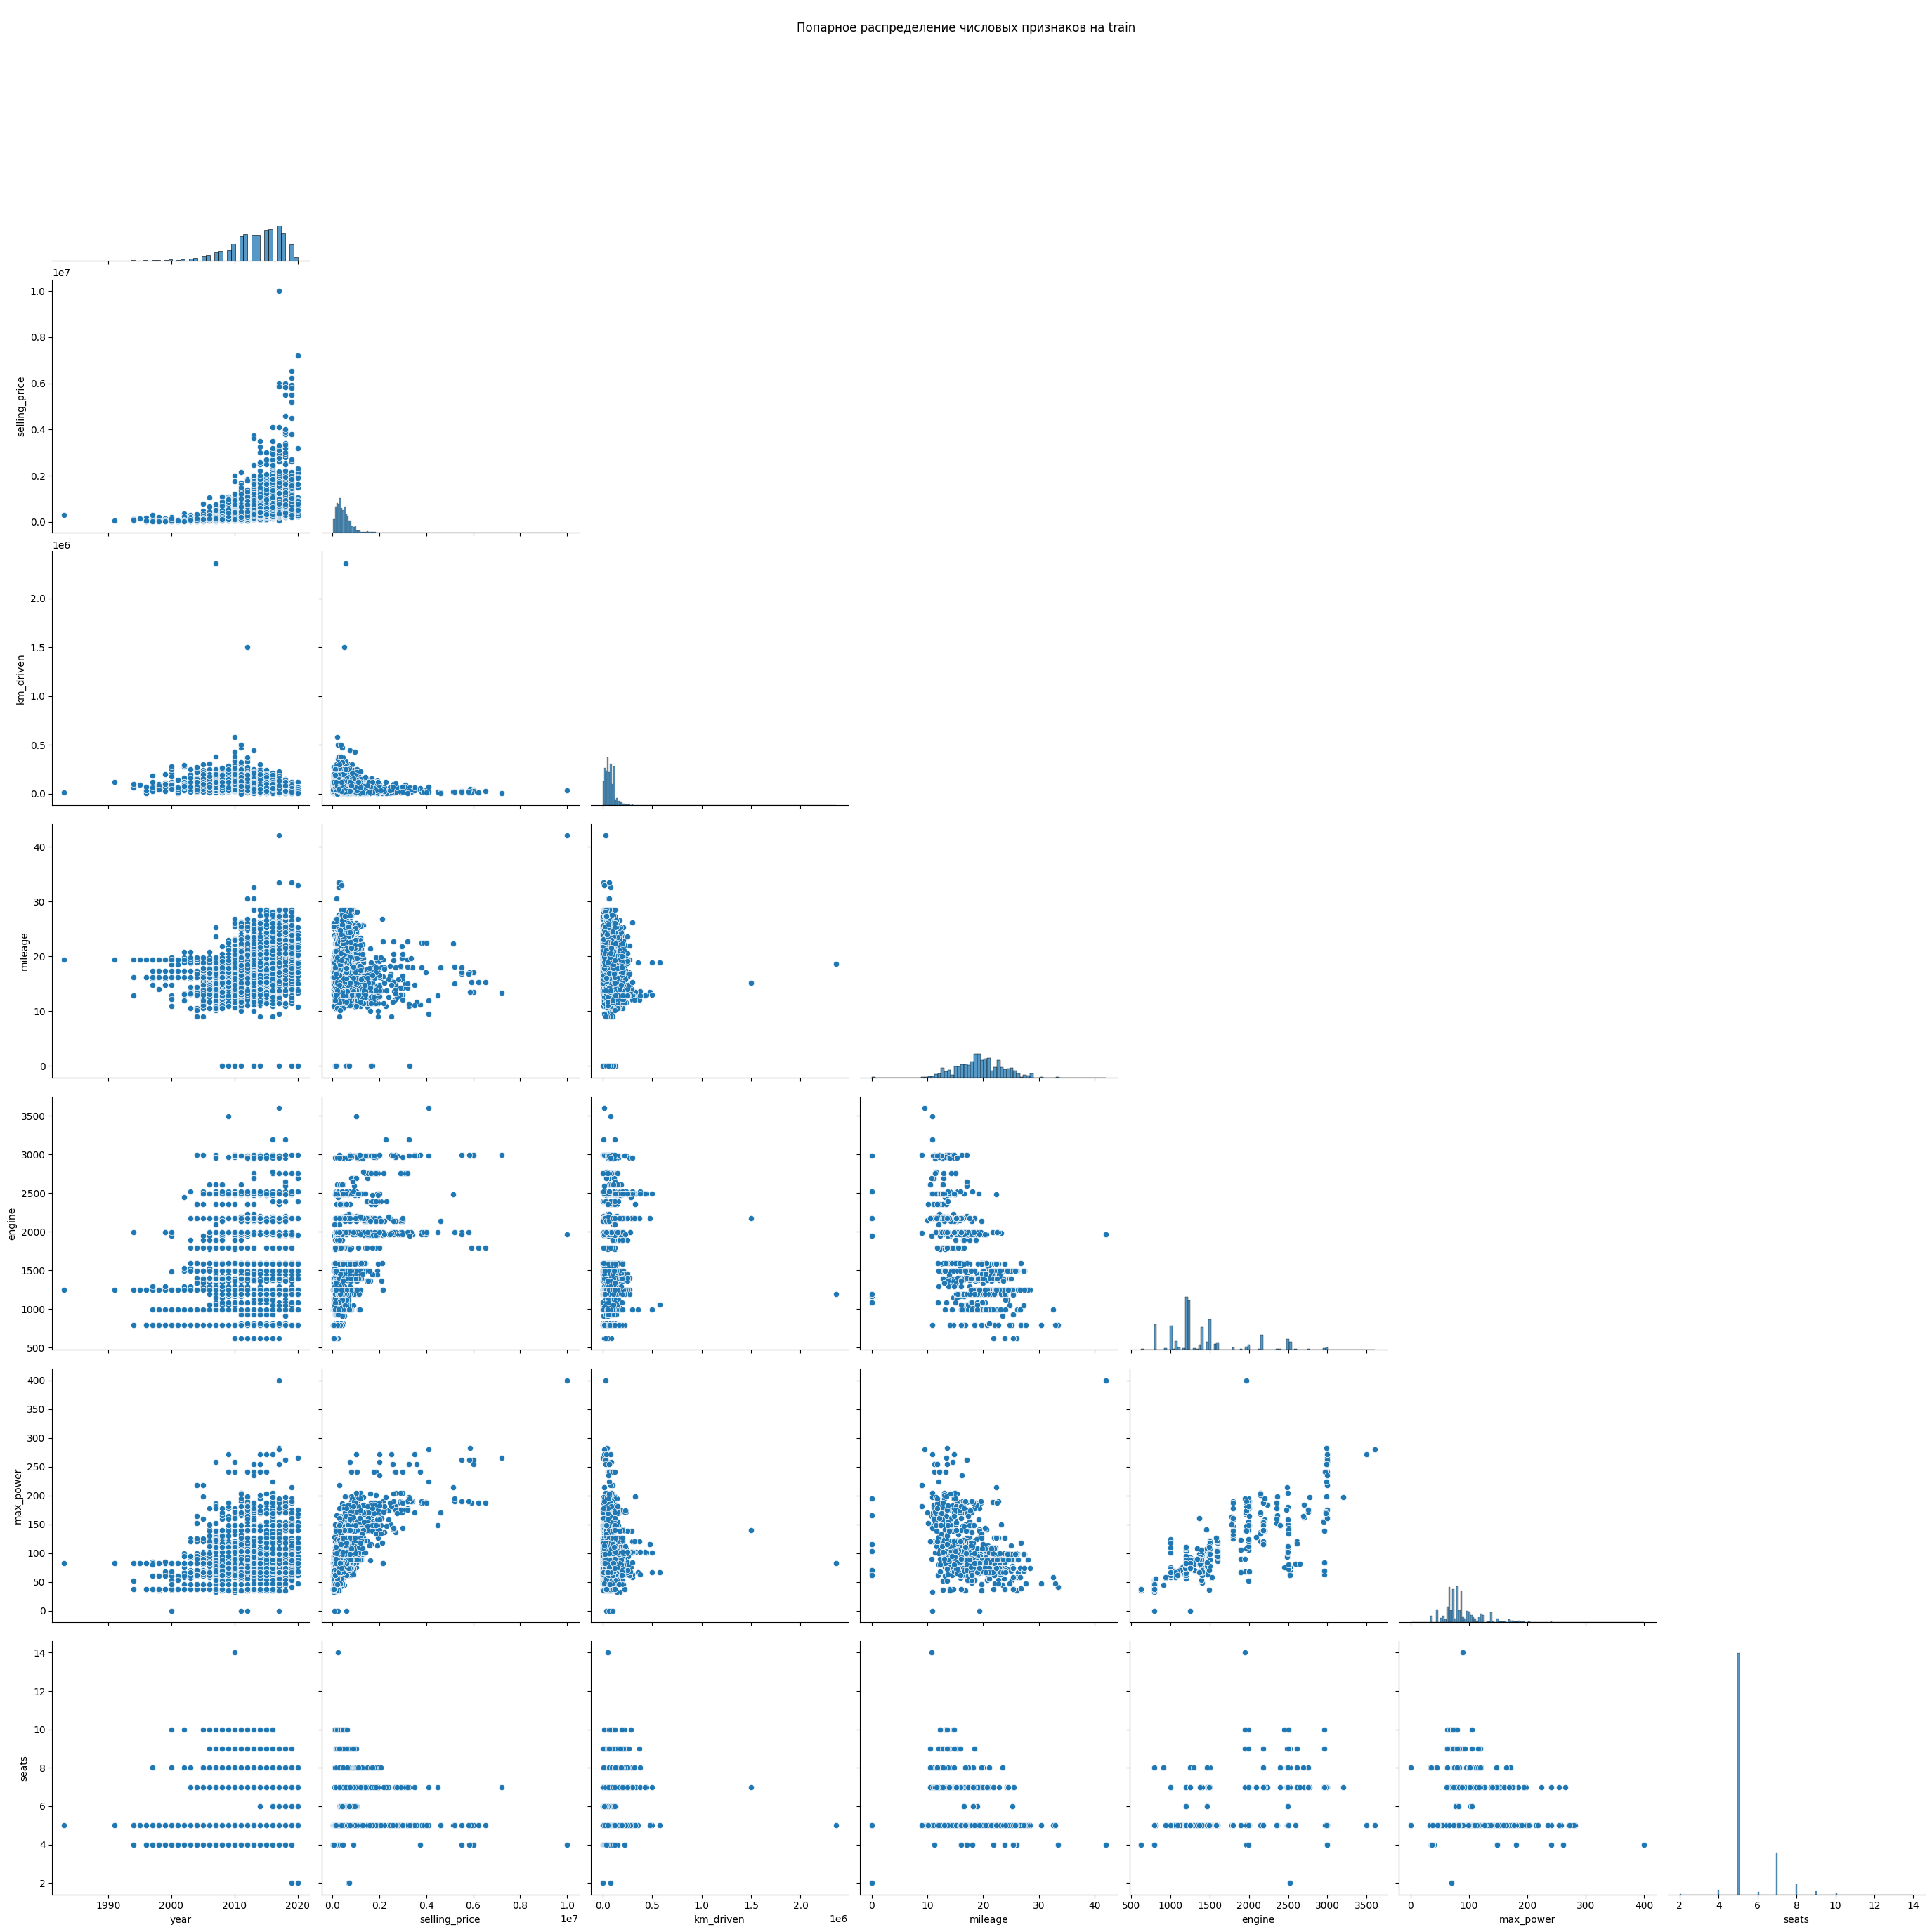

In [368]:
p = sns.pairplot(df_train_num, height=4, corner=True)
p.figure.suptitle("Попарное распределение числовых признаков на train")
plt.show()

Можно ли предположить на основе распределений связь признаков с целевой переменной?

Да, можно, если изучить все графики где участвует selling_price, таким образом можно увидеть что чем больше год выпуска машины(ближе к текучему), тем больше может быть цена на машину. Так же можно увидеть и обратную ситуацию, когда на первый взгляд количество сидений практически вообще не влияет на цену.

В целом выглядит всё так:

year - Возможна положительная кореляция - можно провести линию

km_driven - Сложно что-то сказать

mileage - Нет кореляции, все данные практически стоят одним столбцом

engine -Слишком большая кучность, сложно предположить зависимость

max_power - Слишком большая кучность, сложно предположить зависимость

seats - Нет кореляции

Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Да, можно,облака данных должны иметь вытянутую и тонкую форму, это даёт кореляцию, если оно направленно с левого угла в правый верхний, то это положительная кореляция, если из левого верхнего в правый нижний то отрицательная

Положительную можно увидеть на паре max_power-engine, а отрицательную на паре engine-milliage



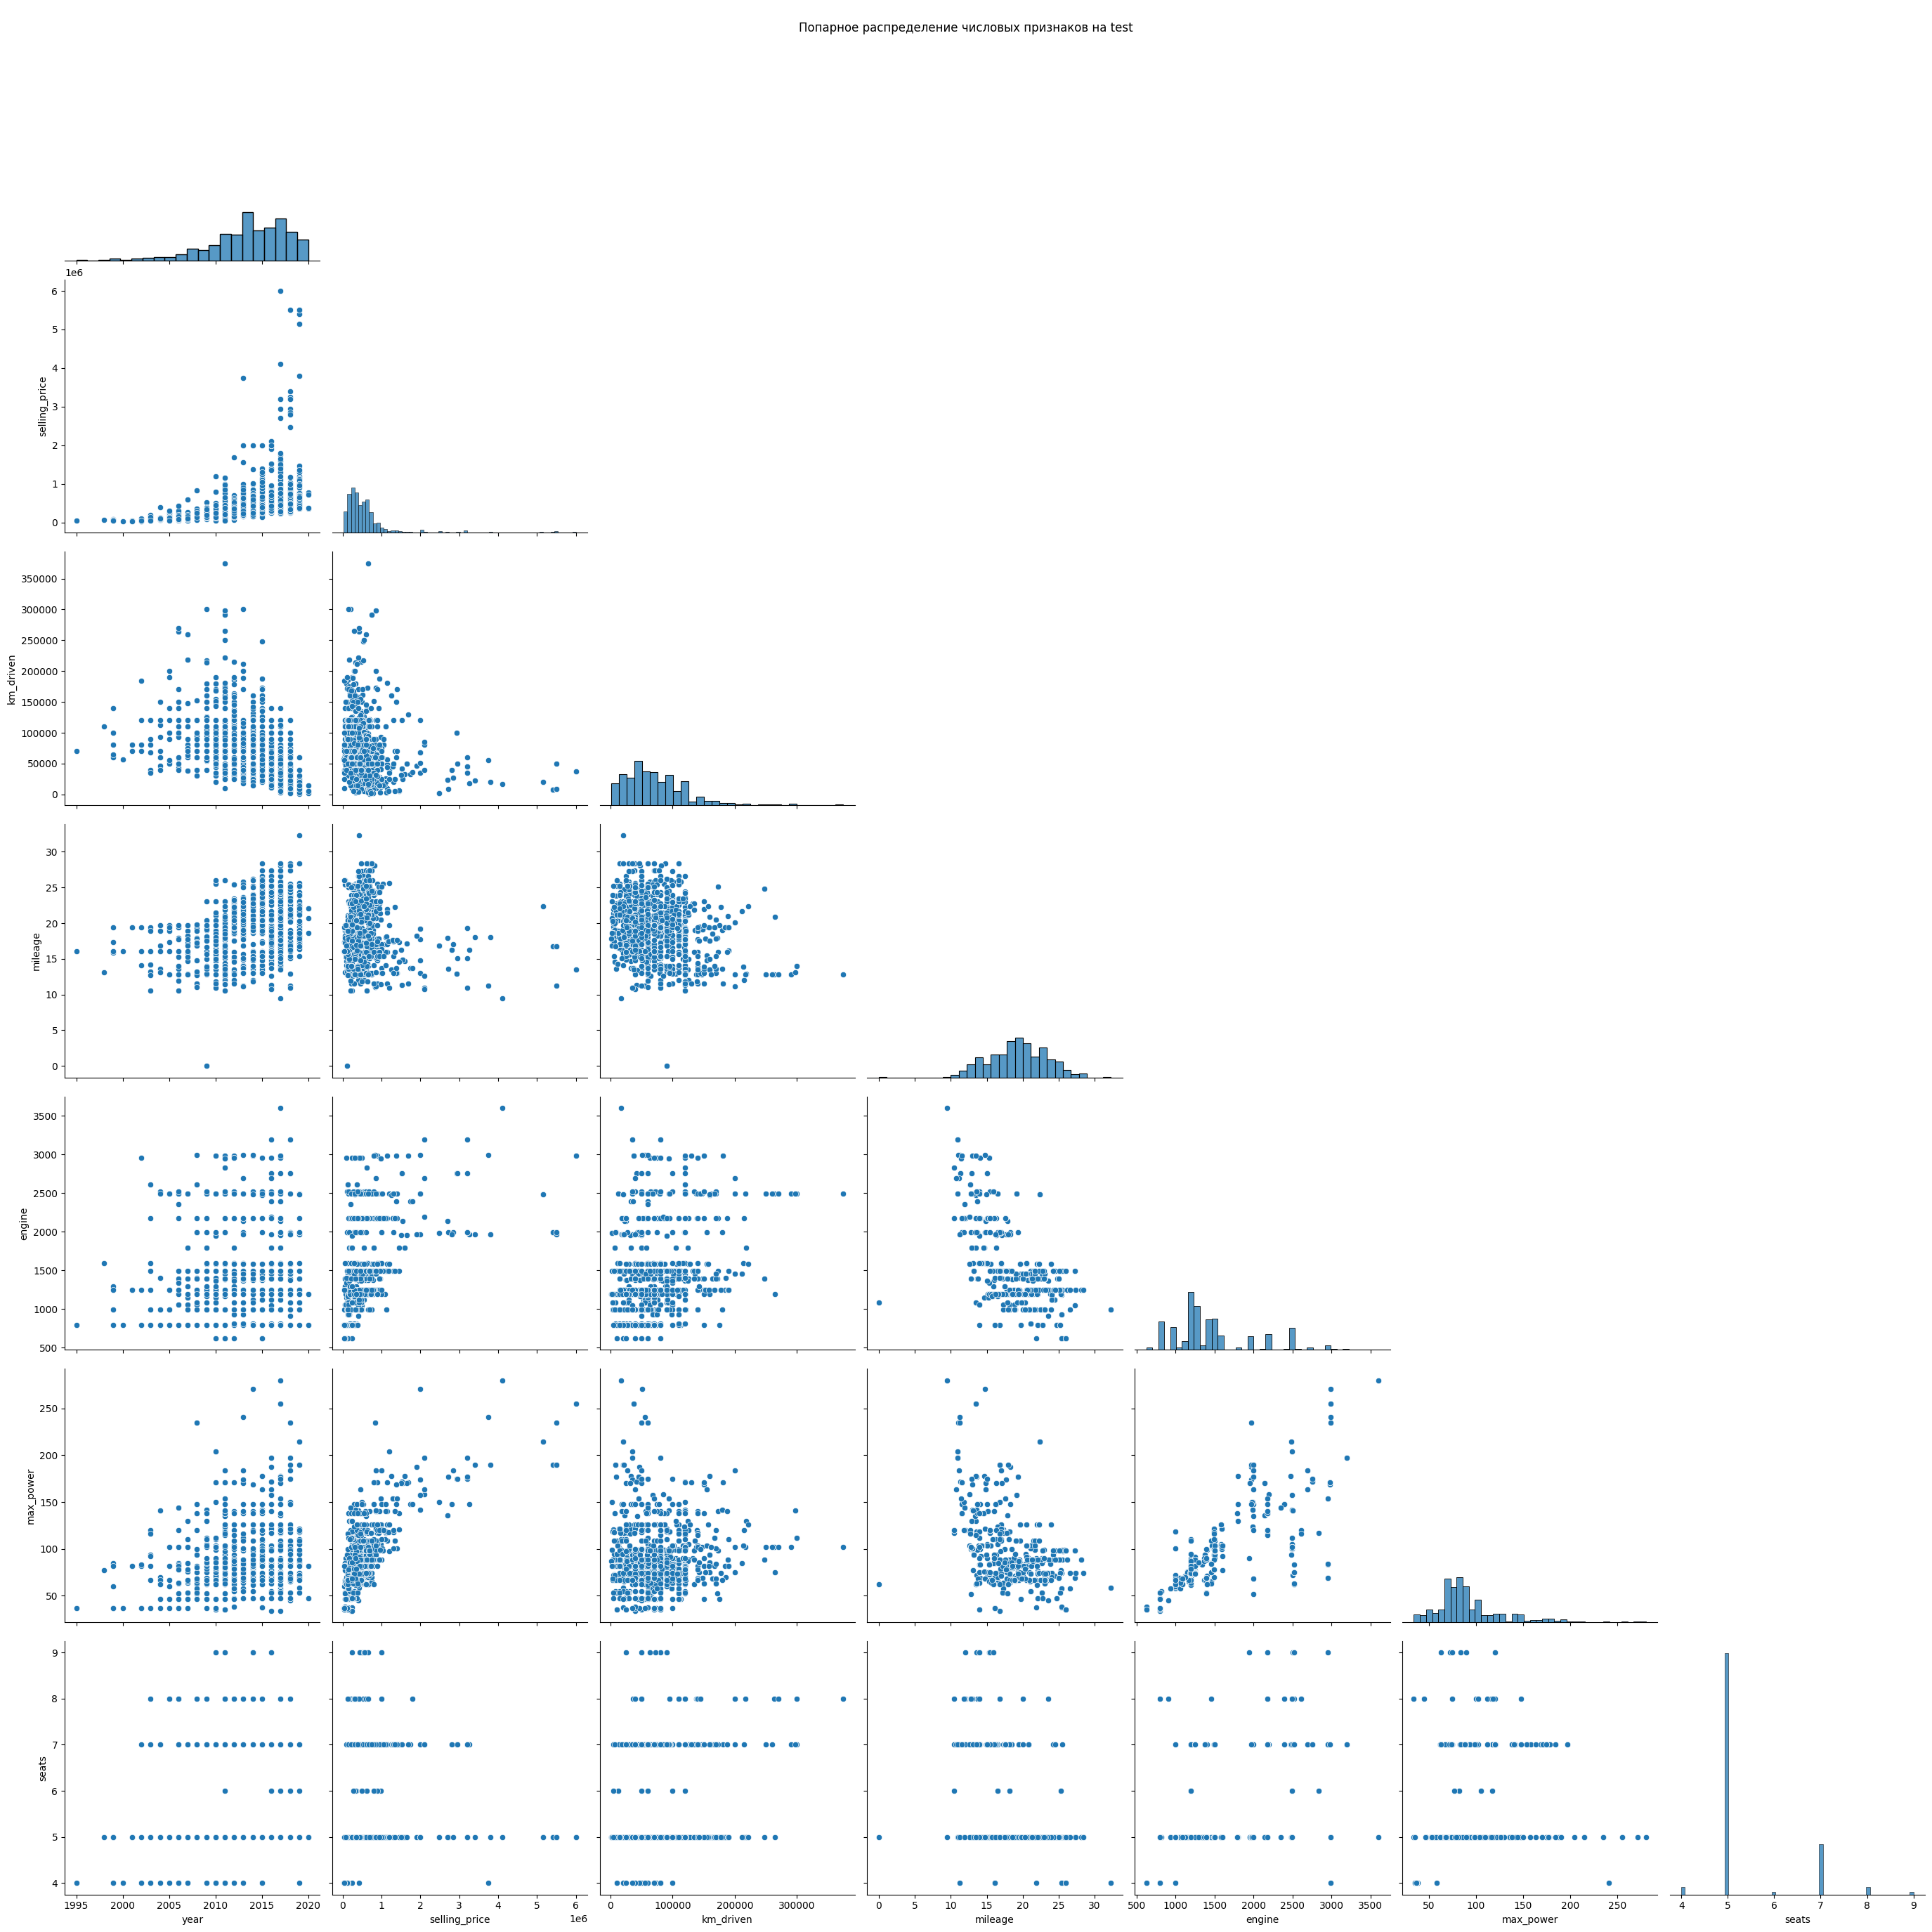

In [369]:
p = sns.pairplot(df_test_num, height=4, corner=True)
p.figure.suptitle("Попарное распределение числовых признаков на test")
plt.show()

Похожими ли оказались совокупности при разделении на трейн и тест?

Да, совокупности получились крайне похожими. В тестовых данных имеется большая кучность, так как данных меньше и меньше данных, что сильно отличаются от остальных

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [370]:
#корреляции Пирсона для тренировочного набора данных

corr = df_train_num.corr()
corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.158207,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.692725,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024379,0.192328
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.372197,-0.451059
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681247,0.652172
max_power,0.158207,0.692725,0.024379,-0.372197,0.681247,1.000000,0.242791
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.242791,1.000000


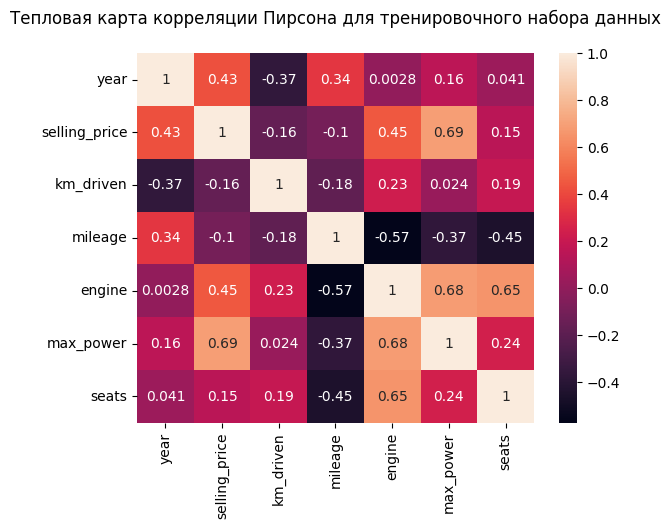

In [371]:
sns.heatmap(corr, annot = True)
plt.title("Тепловая карта корреляции Пирсона для тренировочного набора данных\n")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наибольшую кореляцию имеют max_power и selling_price в 0.692725

Наименьшую кореляцию имеют km_driven и max_power в 0.024

Сильная положительная зависимость наблюдается между engine-seats, engine-max_power, selling_price-max_power и сравнительно меньш8ая но достаточная между selling_price-year и selling_price-engine

Да, согласно данным верно утвержлать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи, так как их кореляция отрицательна и составляет -0.37

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [372]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [373]:
y_train = df_train_num['selling_price']
X_train = df_train_num.drop(columns=['selling_price'])

In [374]:
# опишите выбранные вещественные признакиювкщз
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5
5836,2013,50000,18.90,998,67.10,5
5837,2013,110000,18.50,1197,82.85,5
5838,2007,119000,16.80,1493,110.00,5


In [375]:
y_test = df_test_num['selling_price']
X_test = df_test_num.drop(columns=['selling_price'])

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [376]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_t = model.predict(X_train)
print(f"r2_score train: {r2_score(y_train, pred_t)}")
print(f"MSE train: {MSE(y_train, pred_t)}")
print('='*80)
print(f"r2_score test: {r2_score(y_test, pred)}")
print(f"MSE test: {MSE(y_test, pred)}")

r2_score train: 0.5915050767325436
MSE train: 117090306033.0161
r2_score test: 0.5937024338674333
MSE test: 233551443099.39868


r2_score: 0.5937024338674333

MSE: 233551443099.39868

Мы можем увидеть сравнительно неплохой, но далеко не идеальный результат по r2_score

MSE выглядит большой, учитывая что средняя цена в районе 500 000 - 600 000 (даже учитывая возведение в квадрат)

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [377]:
from sklearn.preprocessing import StandardScaler

# Стандартизируем признаки

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [378]:
#проверяем что стандартизация сработала

X_train_sc

array([[ 0.13956959,  1.19115249,  0.995867  , -0.37364298, -0.4388189 ,
        -0.43441899],
       [ 0.13956959,  0.76661943,  0.42883018,  0.14116151,  0.49363174,
        -0.43441899],
       [-0.83716668,  0.88315792,  0.8955065 , -0.06887872,  0.0665744 ,
        -0.43441899],
       ...,
       [-0.10461448,  0.60013588, -0.2335491 , -0.4786631 , -0.15927323,
        -0.43441899],
       [-1.56971888,  0.74997108, -0.66008122,  0.13086542,  0.69831602,
        -0.43441899],
       [-1.08135075,  0.76661943, -0.03282811, -0.37364298, -0.44197761,
        -0.43441899]], shape=(5840, 6))

In [379]:
model2 = LinearRegression()

model2.fit(X_train_sc, y_train)
pred2 = model2.predict(X_test_sc)
pred2_t = model2.predict(X_train_sc)
print(f"r2_score train: {r2_score(y_train, pred2_t)}")
print(f"MSE train: {MSE(y_train, pred2_t)}")
print('='*80)
print(f"r2_score test: {r2_score(y_test, pred2)}")
print(f"MSE test: {MSE(y_test, pred2)}")

r2_score train: 0.591505076732544
MSE train: 117090306033.01596
r2_score test: 0.5937024338674468
MSE test: 233551443099.39087


Как можно увидеть по результатам маштабирование практически не изменила r2_score

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [380]:
print(model2.coef_)

[152413.79476422 -44299.63423595  28483.92002949  60671.64467376
 322577.60527069 -22512.60179359]


In [381]:
#получаем тмблицу признак - коэфицент

pd.Series(model2.coef_, index=X_train.columns)

year         152413.794764
km_driven    -44299.634236
mileage       28483.920029
engine        60671.644674
max_power    322577.605271
seats        -22512.601794
dtype: float64

Как можно увидеть наибольший коофицент по модулю у признака max_power - 322577.605271



### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [382]:
from sklearn.linear_model import Lasso

model3 = Lasso(random_state=RANDOM_STATE)

model3.fit(X_train_sc, y_train)
pred3 = model3.predict(X_test_sc)
pred3_t = model3.predict(X_train_sc)
print(f"r2_score train: {r2_score(y_train, pred3_t)}")
print(f"MSE train: {MSE(y_train, pred3_t)}")
print('='*80)
print(f"r2_score test: {r2_score(y_test, pred3)}")
print(f"MSE test: {MSE(y_test, pred3)}")

r2_score train: 0.5915050766972044
MSE train: 117090306043.14563
r2_score test: 0.5937012618474564
MSE test: 233552116809.94913


In [383]:
pd.Series(model3.coef_, index=X_train.columns)

year         152413.608387
km_driven    -44298.505045
mileage       28482.039841
engine        60666.793474
max_power    322578.508398
seats        -22509.714823
dtype: float64

r2_score: 0.5937012618474564

MSE: 233552116809.94913

Как можно заметить по r2_score качество модели незначительно ухудщилось по стравнению с предыдущей попыткой примерно на 0.000001

По коофициентам мы явно видим, что никакие веса не были занулированы. Вероятно это случилось потому что параметр альфа по умолчанию слишком маленький и слишком слабо их уменьшает



### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [384]:
from sklearn.model_selection import GridSearchCV

model4 = Lasso(random_state=RANDOM_STATE)
params4 = {'alpha' : [0.1, 1.0, 1.5, 2.0, 5.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]}

gs4 = GridSearchCV(model4, params4, cv=10, scoring='r2')
gs4.fit(X_train_sc, y_train)
pred4 = gs4.predict(X_test_sc)
pred4_t = gs4.predict(X_train_sc)
print(f"r2_score train: {r2_score(y_train, pred4_t)}")
print(f"MSE train: {MSE(y_train, pred4_t)}")
print('='*80)
print(f"r2_score test: {r2_score(y_test, pred4)}")
print(f"MSE test: {MSE(y_test, pred4)}")

r2_score train: 0.5885508836739031
MSE train: 117937091022.5332
r2_score test: 0.5812248664645336
MSE test: 240723905147.48877


грид-сёрчу пришлось обучать 10 (alpha) * 10 (cv) = 100 моделей

In [385]:
pd.Series(gs4.best_estimator_.coef_, index=X_train.columns)

year         151561.753983
km_driven    -32830.089479
mileage        8794.709238
engine        17804.668896
max_power    328841.635146
seats            -0.000000
dtype: float64

In [386]:
gs4.best_params_

{'alpha': 10000.0}

r2_score: 0.5812248664645336

MSE: 240723905147.48877

Мы можем заметить как качество модели немного падает, это говорит нам о том, что вероятно модель просто переобучается и на тестовой выборке её результаты падают.

Лучший парметр альфа получился 10000

В это время параметр seats завнулился

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [387]:
from sklearn.linear_model import ElasticNet

params5 = {'alpha' : [0.1, 1.0, 1.5, 2.0, 5.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0], 'l1_ratio' : [0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9, 0.95, 0.99, 1.0]}

model5 = ElasticNet(max_iter=10000, random_state=RANDOM_STATE)
gs5 = GridSearchCV(model5, params5, cv=10, scoring='r2')
gs5.fit(X_train_sc, y_train)
pred5 = gs5.predict(X_test_sc)
pred5_t = gs5.predict(X_train_sc)
print(f"r2_score train: {r2_score(y_train, pred5_t)}")
print(f"MSE train: {MSE(y_train, pred5_t)}")
print('='*80)
print(f"r2_score test: {r2_score(y_test, pred5)}")
print(f"MSE test: {MSE(y_test, pred5)}")

r2_score train: 0.583801282286214
MSE train: 119298508872.16272
r2_score test: 0.5610639679012236
MSE test: 252312965349.0095


In [388]:
pd.Series(gs5.best_estimator_.coef_, index=X_train.columns)

year         142044.529987
km_driven    -46290.736109
mileage       20114.666718
engine        82270.403293
max_power    266475.789169
seats        -22557.756742
dtype: float64

Модели пришлось обучать 10 (alpha) * 10 (l1_ratio) * 10 (cv) моделей, то есть 1000 моделей

In [389]:
gs5.best_params_

{'alpha': 1.5, 'l1_ratio': 0.9}

Мы можем увидеть что качество опять упало, можно точно говорить что мы переобцчили модель

Лучшие параметры 'alpha': 1.5, 'l1_ratio': 0.9

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

Действительно как упоминалось ранее в name слишком много уникальных значений

In [390]:
#убираем столбец name в train и test

df_train = df_train.drop(columns=['name'])
df_test = df_test.drop(columns=['name'])

In [391]:
y_train_cat = df_train['selling_price']
X_train_cat = df_train.drop(columns=['selling_price'])

y_test_cat = df_test['selling_price']
X_test_cat = df_test.drop(columns=['selling_price'])

In [392]:
X_train_cat.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [393]:
assert X_train_cat.shape == (5840, 10)

In [394]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [395]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

categorical_features = ['seats', 'fuel', 'seller_type', 'transmission', 'owner']
X_train_oh = X_train_cat.copy()
X_test_oh = X_test_cat.copy()
one_hot_encoders = {}
for feature in categorical_features:
    one_hot_enc = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output = False) #создаём кодировщик
    X_train_enc = pd.DataFrame(one_hot_enc.fit_transform(X_train_oh[[feature]])) #кадируем признаки
    X_train_enc.columns = one_hot_enc.get_feature_names_out([feature]) #получаем названия колоннок
    X_test_enc = pd.DataFrame(one_hot_enc.transform(X_test_oh[[feature]]))
    X_test_enc.columns = one_hot_enc.get_feature_names_out([feature])
    X_train_oh = X_train_oh.join(X_train_enc) # Добавляем к изначальному
    X_test_oh = X_test_oh.join(X_test_enc)
    one_hot_encoders[feature] = one_hot_enc
X_train_oh = X_train_oh.drop(columns=categorical_features)
X_test_oh = X_test_oh.drop(columns=categorical_features)

In [396]:
X_train_oh

,year,km_driven,mileage,engine,max_power,seats_4,seats_5,seats_6,seats_7,seats_8,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5836,2013,50000,18.90,998,67.10,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5837,2013,110000,18.50,1197,82.85,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5838,2007,119000,16.80,1493,110.00,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [397]:
X_train_oh.shape

(5840, 23)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [398]:
# Стандартизируем признаки

scaler_oh = StandardScaler()
scaler_oh.fit(X_train_oh)
X_train_oh_sc = scaler_oh.transform(X_train_oh)
X_test_oh_sc = scaler_oh.transform(X_test_oh)

In [399]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params6 = {'alpha' : [0.1, 1, 1.5, 2.0, 5, 10, 100, 1000, 10000, 100000]}

model6 = Ridge(random_state=RANDOM_STATE)
gs6 = GridSearchCV(model6, params6, cv=10, scoring='r2')
gs6.fit(X_train_oh_sc, y_train)
pred6 = gs6.predict(X_test_oh_sc)
pred6_t = gs6.predict(X_train_oh_sc)
print(f"r2_score train: {r2_score(y_train, pred6_t)}")
print(f"MSE train: {MSE(y_train, pred6_t)}")
print('='*80)
print(f"r2_score  train: {r2_score(y_test, pred6)}")
print(f"MSE  train: {MSE(y_test, pred6)}")

r2_score train: 0.6573210327247365
MSE train: 98224929769.97812
r2_score  train: 0.6025619385720483
MSE  train: 228458746806.3728


In [400]:
pd.Series(gs6.best_estimator_.coef_, index=X_train_oh.columns)

year                            128421.037981
km_driven                       -35466.043143
mileage                          19549.449946
engine                           61401.414110
max_power                       220225.712600
seats_4                          52963.230317
seats_5                          -8760.695739
seats_6                          -7992.129803
seats_7                          -3445.466151
seats_8                          -2077.160303
seats_9                          -6045.828107
seats_10                         -3198.416457
seats_14                         -2936.961797
fuel_Diesel                      19409.013664
fuel_LPG                          6649.326645
fuel_Petrol                     -19124.264604
seller_type_Individual          -34998.951248
seller_type_Trustmark Dealer     -6127.858340
transmission_Manual             -87935.149789
owner_Fourth & Above Owner       -9676.161898
owner_Second Owner              -28245.111694
owner_Test Drive Car             7

In [401]:
gs6.best_params_

{'alpha': 1000}

r2_score: 0.6025619385720483
MSE: 228458746806.3728

Удалось совершенно незначительно поднять r2_score выше самой простой линейной регрессии на вещественных признаках

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [402]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred) / y_true <= 0.1)

In [403]:
model_names = ['Классическая линейная регрессия без стандартизации', 'Классическая линейная регрессия со стандартизацией', 'Lasso регрессия', 'Lasso регрессия с Greedsearch', 'ElasticNet регрессия с Greedsearch', 'Ridge с категориальными признаками c Greedsearch']

model_predict=[pred, pred2, pred3, pred4, pred5, pred6]

model_predict_t=[pred_t, pred2_t, pred3_t, pred4_t, pred5_t, pred6_t]

for i in range(len(model_predict)):
    print(f'Модель {model_names[i]}')
    print(f"r2_score train / test: {r2_score(y_train, model_predict_t[i])} / {r2_score(y_test, model_predict[i])}")
    print(f"MSE train / test: {MSE(y_train, model_predict_t[i])} / {MSE(y_test, model_predict[i])}")
    print(f"Бизнес метрика train: {business_metric(y_train, model_predict_t[i])} / {business_metric(y_test, model_predict[i])}\n")

Модель Классическая линейная регрессия без стандартизации
r2_score train / test: 0.5915050767325436 / 0.5937024338674333
MSE train / test: 117090306033.0161 / 233551443099.39868
Бизнес метрика train: 0.21523972602739727 / 0.225

Модель Классическая линейная регрессия со стандартизацией
r2_score train / test: 0.591505076732544 / 0.5937024338674468
MSE train / test: 117090306033.01596 / 233551443099.39087
Бизнес метрика train: 0.21523972602739727 / 0.225

Модель Lasso регрессия
r2_score train / test: 0.5915050766972044 / 0.5937012618474564
MSE train / test: 117090306043.14563 / 233552116809.94913
Бизнес метрика train: 0.21523972602739727 / 0.225

Модель Lasso регрессия с Greedsearch
r2_score train / test: 0.5885508836739031 / 0.5812248664645336
MSE train / test: 117937091022.5332 / 240723905147.48877
Бизнес метрика train: 0.2089041095890411 / 0.236

Модель ElasticNet регрессия с Greedsearch
r2_score train / test: 0.583801282286214 / 0.5610639679012236
MSE train / test: 119298508872.16272

В результате выходит что для залач бизнеса лучше всего подходят Модель Ridge с категориальными признаками c Greedsearch

В результате получается интресное положение: несмотря на то что r2_score часто уменьшалась на тетсовых данных, а на Модель Ridge лишь незначительно увеличилась по сравнению с Классической регрессией бизнес метрика постоянно росла во время улучшения наших моделей. таким образом с точки зрения реальной задачи все шаги проделанные нами были верны

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [404]:
import pickle
import os
from sklearn.pipeline import Pipeline


model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

pipeline_path = os.path.join(model_dir, 'pipeline.pkl')
model6 = Ridge(random_state=RANDOM_STATE, alpha=gs6.best_params_['alpha'])
pipeline = Pipeline([
    ('scaler', scaler_oh),
    ('mpdel', model6)
])
pipeline.fit(X_train_oh, y_train)
pred7 = pipeline.predict(X_test_oh)
print(f"r2_score: {r2_score(y_test, pred7)}")
print(f"MSE: {MSE(y_test, pred7)}")


with open(pipeline_path, 'wb') as f:
    pickle.dump(pipeline, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"Пайплайн сохранен: {pipeline_path}")

with open(pipeline_path, 'rb') as f:
    loaded_pipeline = pickle.load(f)
    print(f"Пайплайн загружен: {pipeline_path}")

pred8 = loaded_pipeline.predict(X_test_oh)
print(f"r2_score: {r2_score(y_test, pred8)}")
print(f"MSE: {MSE(y_test, pred8)}")

r2_score: 0.6025619385720483
MSE: 228458746806.3728
Пайплайн сохранен: models/pipeline.pkl
Пайплайн загружен: models/pipeline.pkl
r2_score: 0.6025619385720483
MSE: 228458746806.3728


In [405]:
df_train_path = os.path.join(model_dir, 'df_train.pkl')

with open(df_train_path, 'wb') as f:
    pickle.dump(df_train, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"df_train сохранен: {df_train_path}")


df_train сохранен: models/df_train.pkl


In [406]:
feature_names = X_train_oh.columns.values
print(feature_names)

feature_names_path = os.path.join(model_dir, 'feature_names.pkl')

with open(feature_names_path, 'wb') as f:
    pickle.dump(feature_names, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"feature_names сохранен: {feature_names_path}")

['year' 'km_driven' 'mileage' 'engine' 'max_power' 'seats_4' 'seats_5'
 'seats_6' 'seats_7' 'seats_8' 'seats_9' 'seats_10' 'seats_14'
 'fuel_Diesel' 'fuel_LPG' 'fuel_Petrol' 'seller_type_Individual'
 'seller_type_Trustmark Dealer' 'transmission_Manual'
 'owner_Fourth & Above Owner' 'owner_Second Owner' 'owner_Test Drive Car'
 'owner_Third Owner']
feature_names сохранен: models/feature_names.pkl


In [407]:
print(one_hot_encoders)
one_hot_encoders_path = os.path.join(model_dir, 'one_hot_encoders.pkl')

with open(one_hot_encoders_path, 'wb') as f:
    pickle.dump(one_hot_encoders, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"one_hot_encoders сохранен: {one_hot_encoders_path}")

{'seats': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 'fuel': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 'seller_type': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 'transmission': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 'owner': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)}
one_hot_encoders сохранен: models/one_hot_encoders.pkl


In [408]:
medians = {'mileage': mileage_median, "engine": engine_median, "max_power": max_power_median, "seats": seats_median}
print(medians)

medians_path = os.path.join(model_dir, 'medians.pkl')

with open(medians_path, 'wb') as f:
    pickle.dump(medians, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"medians сохранен: {medians_path}")

{'mileage': np.float64(19.369999999999997), 'engine': np.float64(1248.0), 'max_power': np.float64(81.86), 'seats': np.float64(5.0)}
medians сохранен: models/medians.pkl


# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.